In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv("Fraud Detection Dataset.csv")
df.head(2)

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card,0


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction_ID                    51000 non-null  object 
 1   User_ID                           51000 non-null  int64  
 2   Transaction_Amount                48480 non-null  float64
 3   Transaction_Type                  51000 non-null  object 
 4   Time_of_Transaction               48448 non-null  float64
 5   Device_Used                       48527 non-null  object 
 6   Location                          48453 non-null  object 
 7   Previous_Fraudulent_Transactions  51000 non-null  int64  
 8   Account_Age                       51000 non-null  int64  
 9   Number_of_Transactions_Last_24H   51000 non-null  int64  
 10  Payment_Method                    48531 non-null  object 
 11  Fraudulent                        51000 non-null  int64  
dtypes: f

In [69]:
df.describe()

,Transaction_Amount,Time_of_Transaction,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Fraudulent
count,41654.000000,41654.000000,41654.000000,41654.000000,41654.000000,41654.000000
mean,2995.321613,11.471455,1.996663,59.915782,7.503193,0.048735
std,4923.540252,6.910507,1.414541,34.354145,4.017987,0.215316
min,5.030000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,1329.010000,5.000000,1.000000,30.000000,4.000000,0.000000
50%,2651.460000,12.000000,2.000000,60.000000,7.000000,0.000000
75%,3718.207500,17.000000,3.000000,90.000000,11.000000,0.000000
max,49997.800000,23.000000,4.000000,119.000000,14.000000,1.000000


In [14]:
df.shape

(51000, 12)

In [6]:
##Checking for Missing Observations
df.isnull().sum()

Transaction_ID                         0
User_ID                                0
Transaction_Amount                  2520
Transaction_Type                       0
Time_of_Transaction                 2552
Device_Used                         2473
Location                            2547
Previous_Fraudulent_Transactions       0
Account_Age                            0
Number_of_Transactions_Last_24H        0
Payment_Method                      2469
Fraudulent                             0
dtype: int64

In [7]:
#Checking Missing Values
features=[i for i in df.columns if df[i].isnull().sum()>=1]
for j in features:
    print(j,np.round(df[j].isnull().mean()*100,5),'% missing values')

Transaction_Amount 4.94118 % missing values
Time_of_Transaction 5.00392 % missing values
Device_Used 4.84902 % missing values
Location 4.99412 % missing values
Payment_Method 4.84118 % missing values


In [8]:
df['Transaction_Amount'].fillna(df['Transaction_Amount'].median(),inplace=True)
df['Transaction_Amount'].isnull().sum()

0

In [9]:
df.dropna(axis=0,inplace=True)
df

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card,0
3,T4,2294,100.10,Bill Payment,15.0,Desktop,Chicago,4,3,4,UPI,0
4,T5,2130,1490.50,POS Payment,19.0,Mobile,San Francisco,2,57,7,Credit Card,0
5,T6,2095,2372.04,ATM Withdrawal,15.0,Desktop,Boston,3,96,14,Credit Card,0
...,...,...,...,...,...,...,...,...,...,...,...,...
50995,T33982,2339,3112.51,Bill Payment,15.0,Mobile,New York,0,7,8,Debit Card,0
50996,T31261,2152,2897.15,Online Purchase,3.0,Mobile,Miami,1,75,11,Net Banking,1
50997,T12293,3345,2204.43,POS Payment,18.0,Mobile,San Francisco,3,73,5,Credit Card,0
50998,T42287,1518,4787.17,POS Payment,19.0,Tablet,New York,2,108,14,Net Banking,0


In [10]:
df.isnull().sum()

Transaction_ID                      0
User_ID                             0
Transaction_Amount                  0
Transaction_Type                    0
Time_of_Transaction                 0
Device_Used                         0
Location                            0
Previous_Fraudulent_Transactions    0
Account_Age                         0
Number_of_Transactions_Last_24H     0
Payment_Method                      0
Fraudulent                          0
dtype: int64

In [11]:
df.drop(['Transaction_ID','User_ID'],axis=1,inplace=True)


In [12]:
##To check all unique values
df['Payment_Method'].value_counts()

Payment_Method
UPI               10265
Debit Card        10142
Net Banking       10005
Credit Card        9936
Invalid Method     1306
Name: count, dtype: int64

In [23]:
## get all the numeric features
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))
num_features

Num of Numerical Features : 6


['Transaction_Amount',
 'Time_of_Transaction',
 'Previous_Fraudulent_Transactions',
 'Account_Age',
 'Number_of_Transactions_Last_24H',
 'Fraudulent']

In [196]:
##get all the categorical features
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 4


In [24]:
num_features1=num_features.remove('Fraudulent')

In [197]:
##Discreet Features
disc_feat=[features for features in num_features if len(df[features].unique())<=25 ]
print(len(disc_feat))

4


In [198]:
##Continuous Features
cont_feat=[features for features in num_features if features not in disc_feat ]
print(len(cont_feat))

2


In [199]:
df.shape

(41654, 10)

Exploratory Data Analysis

<Axes: >

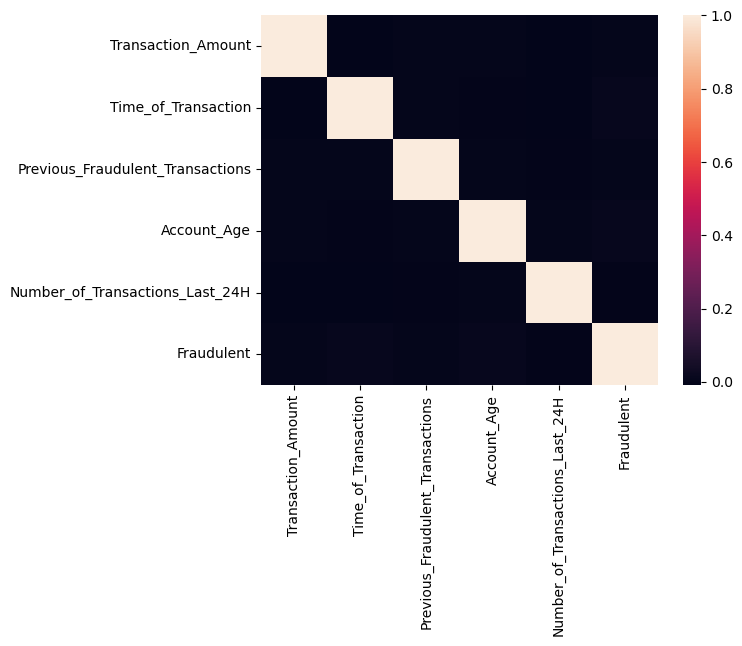

In [83]:
cor_matrix=df[num_features].corr()
sns.heatmap(cor_matrix)

<Axes: >

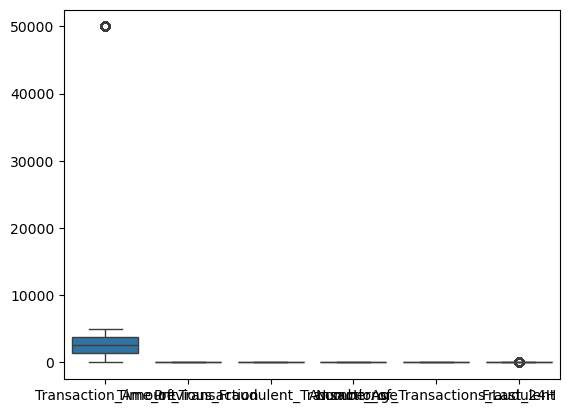

In [84]:

sns.boxplot(df[num_features])

([<matplotlib.patches.Wedge at 0x1bd7d757bc0>,
 [Text(1.0130879860443094, 0.42854723489095753, 'San Francisco'),
  Text(0.40235316464173526, 1.0237733786843555, 'New York'),
  Text(-0.4446902824572345, 1.0061066308737385, 'Chicago'),
  Text(-1.0268085608546487, 0.3945430006420155, 'Boston'),
  Text(-1.004726746848551, -0.4477992453847235, 'Houston'),
  Text(-0.3961688505654338, -1.026182362858407, 'Miami'),
  Text(0.4374700828693695, -1.009267024426275, 'Los Angeles'),
  Text(1.0185618490125583, -0.4153694256154618, 'Seattle')],
 [Text(0.5525934469332595, 0.23375303721324953, '12.7%'),
  Text(0.21946536253185558, 0.5584218429187393, '12.6%'),
  Text(-0.24255833588576425, 0.5487854350220391, '12.6%'),
  Text(-0.5600773968298083, 0.21520527307746296, '12.5%'),
  Text(-0.5480327710083005, -0.24425413384621278, '12.5%'),
  Text(-0.21609210030841844, -0.5597358342864037, '12.4%'),
  Text(0.23862004520147426, -0.5505092860506954, '12.3%'),
  Text(0.5555791903704862, -0.22656514124479732, '12

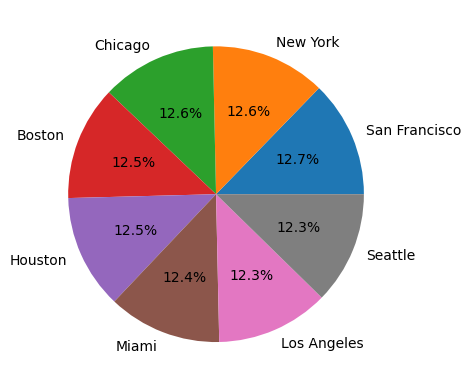

In [96]:
sz=df['Location'].value_counts()/41654*100
sz
plt.pie(sz,labels=df['Location'].unique(),autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0x1bd7bd9a7b0>,
 [Text(0.5768373260401665, 0.9366208941118231, 'Tablet'),
  Text(-1.0955874319232488, 0.0984285477482052, 'Mobile'),
  Text(0.3921411973888628, -1.0277282137367005, 'Desktop'),
  Text(1.0947331534622546, -0.10751429072727008, 'Unknown Device')],
 [Text(0.31463854147645437, 0.5108841240609944, '32.4%'),
  Text(-0.5975931446854084, 0.053688298771748286, '32.3%'),
  Text(0.21389519857574332, -0.5605790256745639, '32.2%'),
  Text(0.5971271746157751, -0.05864415857851094, '3.1%')])

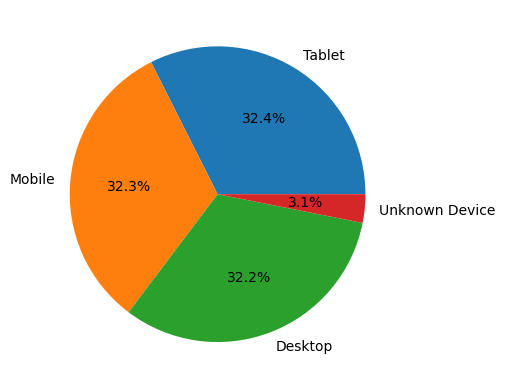

In [97]:
sz=df['Device_Used'].value_counts()/41654*100
sz
plt.pie(sz,labels=df['Device_Used'].unique(),autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0x1bd7be25310>,
 [Text(0.8861881506037864, 0.6516675239180182, 'ATM Withdrawal'),
  Text(-0.3539009491338743, 1.0415152990725307, 'Bill Payment'),
  Text(-1.0998499516647882, -0.01816820912922983, 'POS Payment'),
  Text(-0.3250987698485891, -1.0508619271069508, 'Online Purchase'),
  Text(0.8933101700203192, -0.6418698778866856, 'Bank Transfer')],
 [Text(0.48337535487479255, 0.3554550130461917, '20.2%'),
  Text(-0.19303688134574962, 0.5680992540395622, '20.1%'),
  Text(-0.5999181554535207, -0.009909932252307178, '20.0%'),
  Text(-0.17732660173559403, -0.5731974147856095, '19.9%'),
  Text(0.48726009273835585, -0.35011084248364666, '19.8%')])

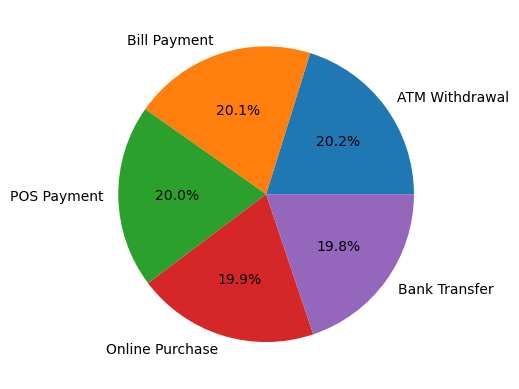

In [98]:
sz=df['Transaction_Type'].value_counts()/41654*100
sz
plt.pie(sz,labels=df['Transaction_Type'].unique(),autopct="%1.1f%%")

MACHINE LEARNING TRAINING

In [200]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score,roc_curve,recall_score,f1_score,precision_score,accuracy_score

In [52]:
y_old=df['Fraudulent']  #Predictor
x_old=df.drop('Fraudulent',axis=1)
x_old.head(2)


,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method
0,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card
1,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card


In [53]:
cat_features = x_old.select_dtypes(include=['object', 'category']).columns.tolist()
num_features1 = x_old.select_dtypes(include=['int64', 'float64']).columns.tolist()

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
         ("OneHotEncoder", oh_transformer, cat_features),
          ("StandardScaler", numeric_transformer, num_features1)
    ]
)

In [54]:
x_old=preprocessor.fit_transform(x_old)


In [29]:
y_old.value_counts()

Fraudulent
0    39624
1     2030
Name: count, dtype: int64

In [55]:
##As it is a severely imbalanced dataset
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x, y = sm.fit_resample(x_old, y_old)

In [56]:
y.shape

(79248,)

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [33]:
models={
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "KNeighborsClassifier":KNeighborsClassifier()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.5464
- F1 score: 0.5463
- Precision: 0.5470
- Recall: 0.5379
- Roc Auc Score: 0.5464
----------------------------------
Model performance for Test set
- Accuracy: 0.5396
- F1 score: 0.5396
- Precision: 0.5403
- Recall: 0.5356
- Roc Auc Score: 0.5396


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9361
- F1 score: 0.9361
- Precision: 0.9295
- Recall: 0.9439
- Roc Auc Score: 0.9361


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9754
- F1 score: 0.9753
- Precision: 0.9976
- Recall: 0.9530
- Roc Auc Score: 0.9754


KNeighborsClassifier
Model performance for Train

In [34]:
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

In [35]:
randomcv_models = [
                   ("RF", RandomForestClassifier(), rf_params)
                   
                   ]

In [232]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(x_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for RF -------------------
{'n_estimators': 500, 'min_samples_split': 2, 'max_features': 5, 'max_depth': None}


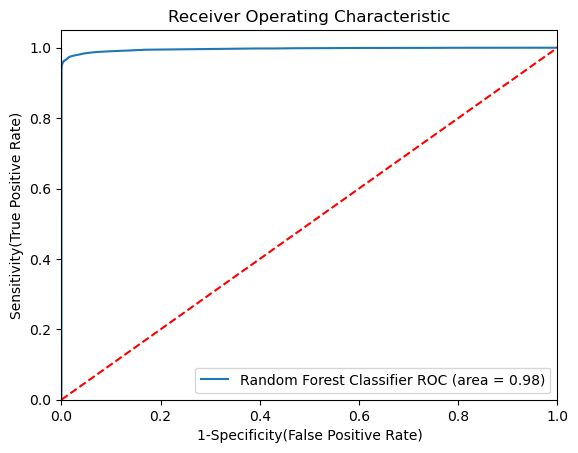

In [36]:
rf_model=RandomForestClassifier(n_estimators=500,min_samples_split=2,max_features=5,max_depth=None)
rf_model.fit(x_train,y_train)
y_pred=rf_model.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('Random Forest Classifier',0.976))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 




In [37]:
import pickle 

In [58]:
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('pipeline.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)    